# install packages

In [1]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
  Using cached https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/detectron2-0.3%2Bcu101-cp37-cp37m-linux_x86_64.whl (6.9 MB)
Processing /home/jovyan/.cache/pip/wheels/bc/cf/1b/e95c99c5f9d1648be3f500ca55e7ce55f24818b0f48336adaf/pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Processing /home/jovyan/.cache/pip/wheels/54/44/e6/9fedd4d73eb21196529e791958ec7b0462ab0ea42100546411/fvcore-0.1.4.post20210323-py3-none-any.whl
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached Cython-0.29.22-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
  Using cached iopath-0.1.7-py3-none-any.whl (19 kB)


In [2]:
!pip install ipywidgets

  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached jupyterlab_widgets-1.0.0-py3-none-any.whl (243 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)


In [3]:
!pip install opencv-python

  Using cached opencv_python-4.5.1.48-cp37-cp37m-manylinux2014_x86_64.whl (50.4 MB)


In [4]:
!pip install imutils

Processing /home/jovyan/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2/imutils-0.5.4-py3-none-any.whl


In [5]:
!pip install albumentations

  Using cached albumentations-0.5.2-py3-none-any.whl (72 kB)
  Using cached opencv_python_headless-4.5.1.48-cp37-cp37m-manylinux2014_x86_64.whl (37.6 MB)
  Using cached scikit_image-0.18.1-cp37-cp37m-manylinux1_x86_64.whl (29.2 MB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-manylinux1_x86_64.whl (4.4 MB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Using cached tifffile-2021.3.17-py3-none-any.whl (163 kB)
  Using cached Shapely-1.7.1-cp37-cp37m-manylinux1_x86_64.whl (1.0 MB)


In [6]:
!pip install albumentations==0.4.6

Processing /home/jovyan/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc/albumentations-0.4.6-py3-none-any.whl
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.5.2
    Uninstalling albumentations-0.5.2:
      Successfully uninstalled albumentations-0.5.2


# import

In [3]:
import torch, torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

from detectron2.data import MetadataCatalog,DatasetCatalog

from matplotlib import pyplot as plt
%matplotlib inline

from detectron2.data.datasets import register_coco_instances,load_coco_json

import json

import copy

import pandas as pd

from detectron2.data import build_detection_train_loader
from detectron2.data import transforms as T
from detectron2.data import detection_utils as utils
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
import copy

from imutils import paths
import argparse
import cv2
import tqdm

#import ipywidgets as widgets
#from ipywidgets import interact, interact_manual

# model

In [4]:
DatasetCatalog.clear()

In [5]:
#change paths for your data (images folder and annotations.json)

In [6]:
for d in ['train','val']:
    DatasetCatalog.register("my_dataset_"+d, lambda d=d: load_coco_json("/home/jovyan/COMPETITIONS_participate/AICROWD/{}/annotations_filtered.json".format(d,d),
    image_root= "/home/jovyan/COMPETITIONS_participate/AICROWD/{}/images".format(d),\
    dataset_name="my_dataset_"+d))

In [7]:
dataset_dicts_train = DatasetCatalog.get("my_dataset_train")

[03/25 12:14:10 d2.data.datasets.coco]: Loading /home/jovyan/COMPETITIONS_participate/AICROWD/train/annotations_filtered.json takes 2.06 seconds.
WARNING [03/25 12:14:10 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/25 12:14:10 d2.data.datasets.coco]: Loaded 24120 images in COCO format from /home/jovyan/COMPETITIONS_participate/AICROWD/train/annotations_filtered.json


In [8]:
dataset_dicts_test = DatasetCatalog.get("my_dataset_val")

WARNING [03/25 12:14:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/25 12:14:11 d2.data.datasets.coco]: Loaded 1269 images in COCO format from /home/jovyan/COMPETITIONS_participate/AICROWD/val/annotations_filtered.json


In [9]:
train_metadata = MetadataCatalog.get("my_dataset_train")

test_metadata = MetadataCatalog.get("my_dataset_val")

{'file_name': '/home/jovyan/COMPETITIONS_participate/AICROWD/train/images/006316.jpg', 'height': 426, 'width': 426, 'image_id': 6316, 'annotations': [{'iscrowd': 0, 'bbox': [13.0, 48.0, 357.0, 371.0], 'category_id': 193, 'segmentation': [[272.0, 418.5, 237.99999999999997, 412.5, 215.5, 404.0, 228.5, 393.0, 241.5, 360.0, 242.49999999999997, 350.0, 232.50000000000003, 331.0, 223.0, 322.5, 199.0, 312.5, 156.0, 267.5, 133.0, 249.49999999999997, 116.0, 239.49999999999997, 90.0, 231.5, 76.0, 234.5, 61.00000000000001, 232.50000000000003, 51.5, 240.99999999999997, 47.5, 255.0, 32.5, 269.0, 29.5, 329.0, 35.5, 342.0, 47.5, 350.0, 43.5, 365.0, 54.49999999999999, 378.0, 43.0, 390.5, 34.0, 392.5, 31.5, 390.0, 31.5, 342.0, 19.5, 338.0, 12.5, 229.0, 17.5, 180.0, 13.5, 156.0, 13.5, 56.00000000000001, 18.0, 48.5, 72.0, 47.5, 110.0, 51.5, 144.0, 59.49999999999999, 169.0, 60.5, 227.0, 56.5, 240.0, 60.5, 246.5, 66.0, 239.49999999999997, 92.0, 224.5, 107.00000000000001, 221.5, 120.0, 222.50000000000003, 13

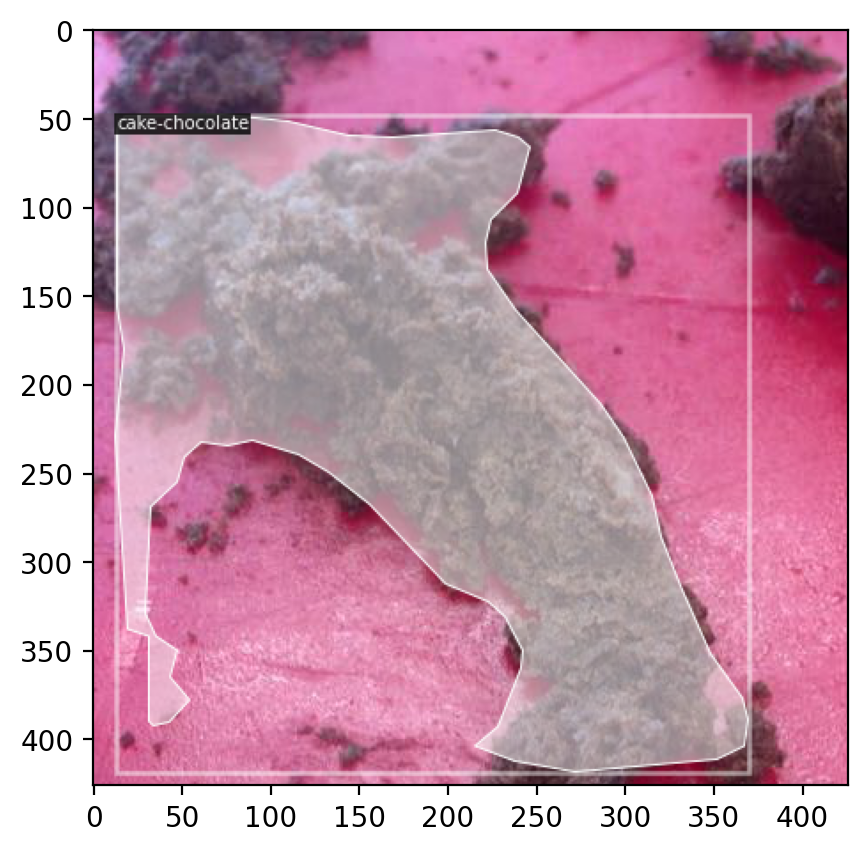

In [10]:
import os
from IPython.display import Image
example = dataset_dicts_train[0]
image = utils.read_image(example["file_name"], format="RGB")
print(example)
plt.figure(figsize=(5,5),dpi=200)
visualizer = Visualizer(image[:, :, ::-1], metadata=train_metadata, scale=1.0)
vis = visualizer.draw_dataset_dict(example)
plt.imshow(vis.get_image()[:, :,::-1])
plt.show()

# copy-paste

In [11]:
#import scripts
from copy_paste import CopyPaste
from coco import CocoDetectionCP

In [12]:
import albumentations as A

In [14]:
aug_list = [A.Resize(800,800),#resize all images to fixed shape
        CopyPaste(blend=True, sigma=1, pct_objects_paste=0.9, p=1.0) #pct_objects_paste is a guess
    ]
        
    
#you can add any augmentation from albumentations to this list, for example, you can use:


aug_list = [A.Resize(800,800),\
            A.OneOf([A.HorizontalFlip(),A.RandomRotate90()],p=0.75),\
            A.OneOf([A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=35, val_shift_limit=25),A.RandomGamma(),A.CLAHE()],p=0.5),\
            A.OneOf([A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25),A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15)],p=0.5),\
            A.OneOf([A.Blur(),A.MotionBlur(),A.GaussNoise(),A.ImageCompression(quality_lower=75)],p=0.5),
        CopyPaste(blend=True, sigma=1, pct_objects_paste=0.9, p=1.0) #pct_objects_paste is a guess
    ]


transform = A.Compose(
            aug_list, bbox_params=A.BboxParams(format="coco")
        )

add path to your images and annotations

In [15]:
data = CocoDetectionCP(
    '/home/jovyan/COMPETITIONS_participate/AICROWD/train/images', 
    '/home/jovyan/COMPETITIONS_participate/AICROWD/train/annotations_filtered.json', 
    transform
)

loading annotations into memory...
Done (t=1.91s)
creating index...
index created!


# visualize

In [31]:
from visualize import display_instances

augmentation change after each iteration

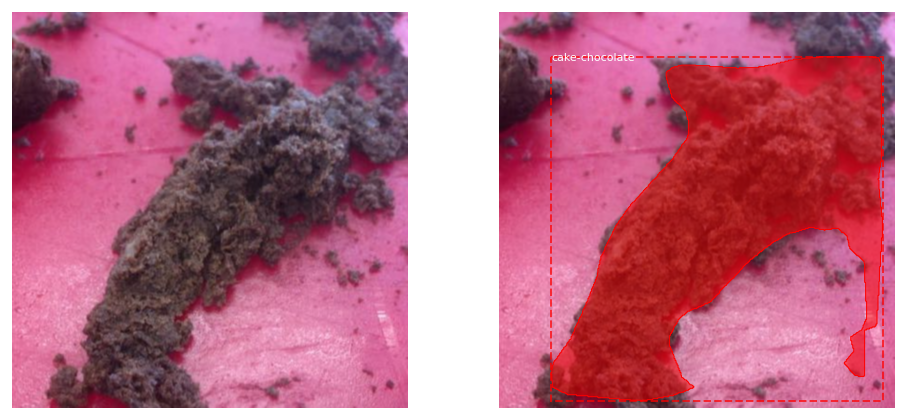

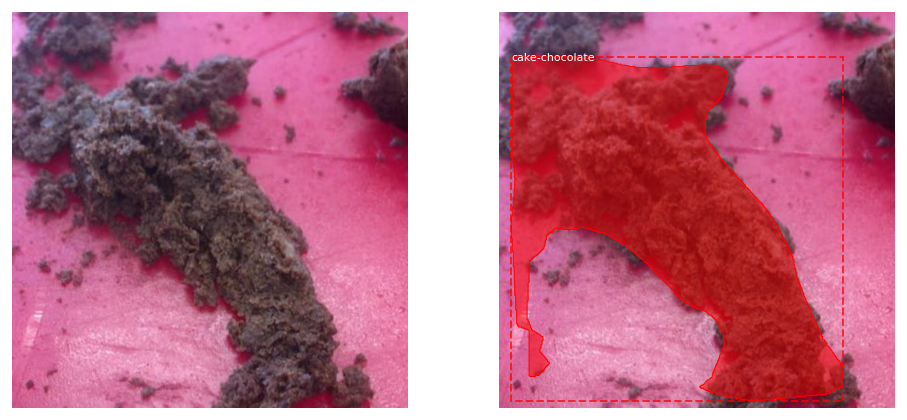

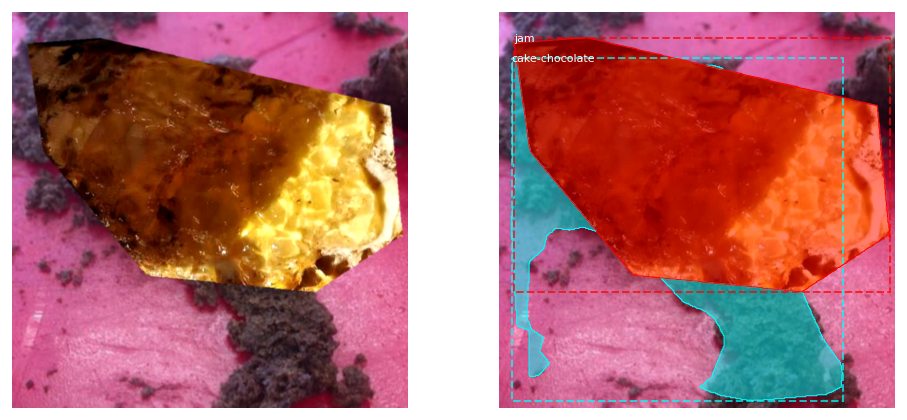

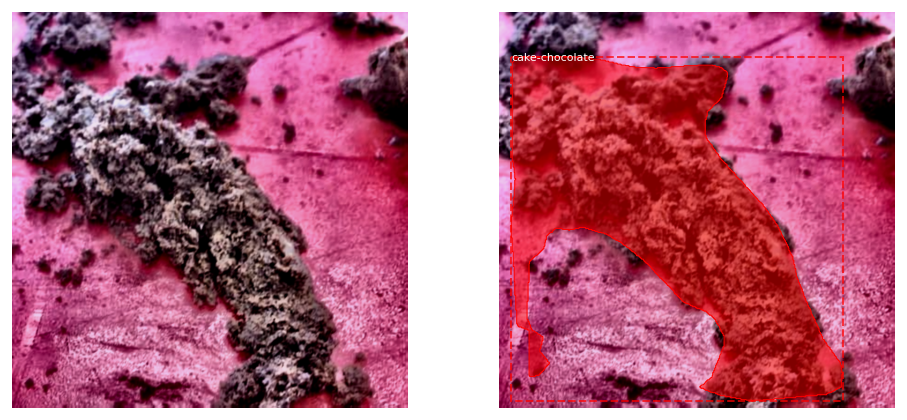

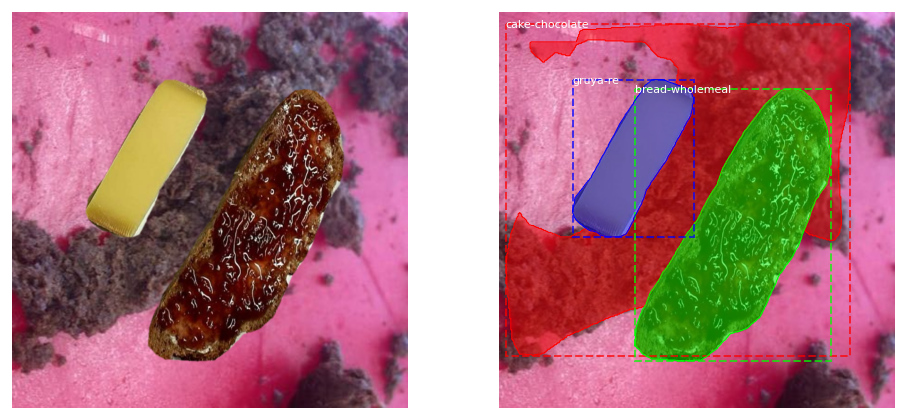

In [37]:
for i in range(5):

    img_data = data[0]

    f, ax = plt.subplots(1, 2, figsize=(16, 16))
    image = img_data['image']
    masks = img_data['masks']
    bboxes = img_data['bboxes']

    empty = np.array([])
    display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[0])

    if len(bboxes) > 0:
        boxes = np.stack([b[:4] for b in bboxes], axis=0)
        box_classes = np.array([b[-2] for b in bboxes])
        mask_indices = np.array([b[-1] for b in bboxes])
        show_masks = np.stack(masks, axis=-1)[..., mask_indices]
        class_names = {k: data.coco.cats[k]['name'] for k in data.coco.cats.keys()}
        display_instances(image, boxes, show_masks, box_classes, class_names, show_bbox=True, ax=ax[1])
    else:
        display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[1])

some trciks to map detectron's dataset_dicts_train to data from copy-paste

In [17]:
data_id_to_num = {i:q for q,i in enumerate(data.ids)}

ALL_IDS = list(data_id_to_num.keys())

dataset_dicts_train = [i for i in dataset_dicts_train if i['image_id'] in ALL_IDS]

BOX_MODE = dataset_dicts_train[0]['annotations'][0]['bbox_mode']

In [18]:
import copy
import logging

import detectron2.data.transforms as T
import torch
from detectron2.data import detection_utils as utils

import json
import numpy as np
from pycocotools import mask
from skimage import measure

Wtite custom mapper

In [19]:
class MyMapper:
    """Mapper which uses `detectron2.data.transforms` augmentations"""

    def __init__(self, cfg, is_train: bool = True):

        self.is_train = is_train

        mode = "training" if is_train else "inference"
        #print(f"[MyDatasetMapper] Augmentations used in {mode}: {self.augmentations}")

    def __call__(self, dataset_dict):
        dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
        img_id = dataset_dict['image_id']
        
        
        aug_sample = data[data_id_to_num[img_id]]
        
        image = aug_sample['image']
        
        image =  cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))
        
        
        bboxes = aug_sample['bboxes']
        box_classes = np.array([b[-2] for b in bboxes])
        boxes = np.stack([b[:4] for b in bboxes], axis=0)
        mask_indices = np.array([b[-1] for b in bboxes])
        
        
        masks = aug_sample['masks']
        
        annos = []
        
        for enum,index in enumerate(mask_indices):
            curr_mask = masks[index]
            
            fortran_ground_truth_binary_mask = np.asfortranarray(curr_mask)
            encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
            ground_truth_area = mask.area(encoded_ground_truth)
            ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
            contours = measure.find_contours(curr_mask, 0.5)
            
            annotation = {
        "segmentation": [],
        "iscrowd": 0,
        "bbox": ground_truth_bounding_box.tolist(), 
        "category_id": train_metadata.thing_dataset_id_to_contiguous_id[box_classes[enum]]  ,
        "bbox_mode":BOX_MODE
                
                
    }
            for contour in contours:
                contour = np.flip(contour, axis=1)
                segmentation = contour.ravel().tolist()
                annotation["segmentation"].append(segmentation)
                
            annos.append(annotation)
        

        image_shape = image.shape[:2]  # h, w

        
        instances = utils.annotations_to_instances(annos, image_shape)
        dataset_dict["instances"] = utils.filter_empty_instances(instances)
        return dataset_dict

In [20]:
import os

from detectron2.data import build_detection_test_loader, build_detection_train_loader
from detectron2.engine import DefaultPredictor, DefaultTrainer, launch

Use custom Trainer

In [21]:
class MyTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg, sampler=None):
        return build_detection_train_loader(
            cfg, mapper=MyMapper(cfg, True), sampler=sampler
        )


In [22]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.engine import HookBase
import detectron2.utils.comm as comm
from detectron2.engine import launch

cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)


cfg.DATASETS.VAL = ("my_dataset_val",)

                
cfg.INPUT.MIN_SIZE_TEST= 800
cfg.INPUT.MAX_SIZE_TEST = 800
cfg.INPUT.MIN_SIZE_TRAIN = 800
cfg.INPUT.MAX_SIZE_TRAIN = 800

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.0001

cfg.INPUT.FORMAT = 'BGR'
cfg.DATASETS.TEST = ("my_dataset_test",)
cfg.DATALOADER.NUM_WORKERS = 6
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.SOLVER.IMS_PER_BATCH = 10 #increase it
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.GAMMA = 0.1
cfg.SOLVER.STEPS = (4000,)
# The iteration number to decrease learning rate by GAMMA.

cfg.SOLVER.WARMUP_FACTOR = 1.0 / 3
cfg.SOLVER.WARMUP_ITERS = 500
cfg.SOLVER.WARMUP_METHOD = "linear"



cfg.SOLVER.MAX_ITER =121000    
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 273
cfg.MODEL.RETINANET.NUM_CLASSES = 273
cfg.SOLVER.CHECKPOINT_PERIOD = 1000




cfg.OUTPUT_DIR = './output_aug/'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = MyTrainer(cfg) 

trainer.resume_or_load(resume=False)


[03/25 12:20:16 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (274, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (274,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (1092, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (1092,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (273, 2

start train

In [23]:
trainer.train()

[03/25 12:20:24 d2.engine.train_loop]: Starting training from iteration 0


/home/jovyan/COMPETITIONS_participate/AICROWD/DETECTRON_SOURCE/detectron2/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/jovyan/COMPETITIONS_participate/AICROWD/DETECTRON_SOURCE/detectron2/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/jovyan/COMPETITIONS_participate/AICROWD/DETECTRON_SOURCE/detectron2/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following 

[03/25 12:21:11 d2.utils.events]:  eta: 3 days, 1:46:35  iter: 19  total_loss: 1.489  loss_cls: 0.4863  loss_box_reg: 0.2272  loss_mask: 0.675  loss_rpn_cls: 0.0222  loss_rpn_loc: 0.01465  time: 2.2994  data_time: 0.2375  lr: 0.0071733  max_mem: 10572M
[03/25 12:21:53 d2.utils.events]:  eta: 2 days, 21:38:55  iter: 39  total_loss: 1.378  loss_cls: 0.4886  loss_box_reg: 0.2582  loss_mask: 0.5985  loss_rpn_cls: 0.01595  loss_rpn_loc: 0.01518  time: 2.1965  data_time: 0.1531  lr: 0.0077067  max_mem: 10572M
[03/25 12:21:59 d2.engine.hooks]: Overall training speed: 41 iterations in 0:01:29 (2.1830 s / it)
[03/25 12:21:59 d2.engine.hooks]: Total training time: 0:01:29 (0:00:00 on hooks)
[03/25 12:21:59 d2.utils.events]:  eta: 2 days, 21:37:32  iter: 43  total_loss: 1.348  loss_cls: 0.4886  loss_box_reg: 0.255  loss_mask: 0.5813  loss_rpn_cls: 0.01432  loss_rpn_loc: 0.01437  time: 2.1807  data_time: 0.1535  lr: 0.0077867  max_mem: 10572M


KeyboardInterrupt: 